In [1]:
import pandas as pd
import numpy as np

# Load Data

Load the data which contains the closing, low and high prices of stocks

In [4]:
data = pd.read_csv('eod-quotemedia.csv', parse_dates=['date'], index_col=False)

close = data.reset_index().pivot(index='date', columns='ticker', values='adj_close')
high = data.reset_index().pivot(index='date', columns='ticker', values='adj_high')
low = data.reset_index().pivot(index='date', columns='ticker', values='adj_low')

In [5]:
close

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,29.994186,16.176093,81.138217,53.109173,34.924478,50.863198,31.425388,64.694095,46.235,39.913360,...,27.668791,35.288928,76.320802,40.023873,22.106665,25.753386,45.480383,71.898827,27.858587,29.447893
2013-07-02,29.650137,15.819834,80.722073,54.312247,35.428076,50.696766,31.272881,64.712041,46.030,39.860576,...,27.542284,35.059033,76.608168,39.965530,22.082740,25.613675,45.402661,72.934172,28.038932,28.572441
2013-07-03,29.705185,16.127950,81.237299,54.612043,35.444862,50.937167,30.725650,65.214519,46.420,40.186077,...,27.334452,35.280086,76.650427,40.004426,22.202365,25.734758,46.063299,72.301458,28.181310,28.168387
2013-07-05,30.434568,16.214608,81.821882,54.173381,35.856134,51.371737,31.326707,66.075911,47.000,40.652334,...,27.695899,35.801771,77.394196,40.675380,22.585164,26.060750,46.413048,73.164246,29.396267,29.024598
2013-07-08,30.524021,16.310894,82.951417,53.865799,36.661889,52.037461,31.766285,66.820655,46.625,40.256455,...,27.985057,35.200507,77.968926,40.646208,22.489464,26.228403,46.950626,73.892823,29.576612,29.765365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-26,58.578545,48.362348,121.521592,143.572709,70.355209,94.310434,47.952274,120.091012,144.960,78.926776,...,42.768925,65.995879,78.125436,63.566740,27.954615,54.057499,73.499346,127.972643,41.755545,62.430093
2017-06-27,58.222564,48.084745,121.691217,141.514919,70.016684,93.858483,47.716973,119.943770,142.540,76.546336,...,43.141511,63.781646,78.000420,63.923912,27.753502,53.879548,72.742128,127.169467,41.952785,62.469909
2017-06-28,58.736758,48.828324,116.452788,143.582555,70.529308,94.693610,47.530694,121.465276,143.810,77.584717,...,43.308194,64.673218,78.404318,64.824284,28.289802,54.344197,72.919140,127.427277,42.376849,62.659030


<AxesSubplot:xlabel='date'>

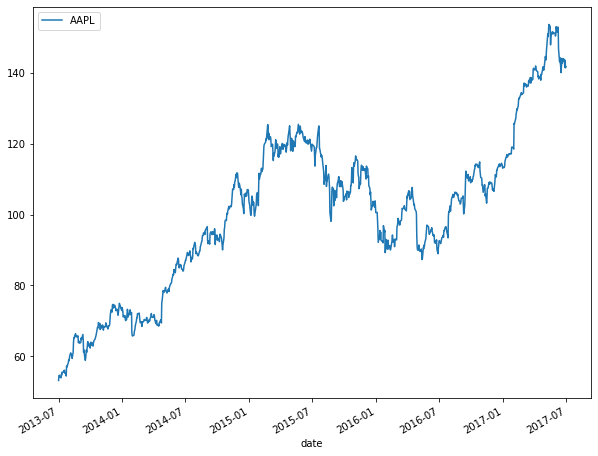

In [72]:
close.plot(y = 'AAPL', figsize=(10, 8))

# Alpha Research Breakout Strategy

The signal-to-noise ratio in trading signals is very low and, as such, it is very easy to fall into the trap of overfitting to noise. It is therefore inadvisable to jump right into signal coding. 

# Compute the Highs and Lows in a Window

We will us the price highs and lows as an indicator for the breakout strategy. We implement get_high_lows_lookback to get the maximum high price and minimum low price over a window of days. The variable lookback_days contains the number of days to look in the past. Thus we make sure this doesn't include the current day.

In [7]:
def get_high_lows_lookback(high, low, lookback_days):
    """
    Get the highs and lows in a lookback window.
    
    Parameters
    ----------
    high : DataFrame
        High price for each ticker and date
    low : DataFrame
        Low price for each ticker and date
    lookback_days : int
        The number of days to look back
    
    Returns
    -------
    lookback_high : DataFrame
        Lookback high price for each ticker and date
    lookback_low : DataFrame
        Lookback low price for each ticker and date
    """
    # compute rolling max from high prices and shift by one day to discard the current day
    lookback_max = high.rolling(window=lookback_days, min_periods=lookback_days).max().shift()
    
    # compute rolling min from low prices and shift by one day to discard the current day
    lookback_min = low.rolling(window=lookback_days, min_periods=lookback_days).min().shift()

    return lookback_max, lookback_min

In [8]:
lookback_days = 50
lookback_high, lookback_low = get_high_lows_lookback(high, low, lookback_days)

# Compute Long and Short Signals
Using the generated indicator of highs and lows, create long and short signals using a breakout strategy. Implement get_long_short to generate the following signals:

Signal	Condition
-1 : Low > Close Price
1 : High < Close Price
0 : Otherwise

In this chart, Close Price is the close parameter. Low and High are the values generated from get_high_lows_lookback, the lookback_high and lookback_low parameters.

In [12]:
def get_long_short(close, lookback_high, lookback_low):
    """
    Generate the signals long, short, and do nothing.
    
    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    lookback_high : DataFrame
        Lookback high price for each ticker and date
    lookback_low : DataFrame
        Lookback low price for each ticker and date
    
    Returns
    -------
    long_short : DataFrame
        The long, short, and do nothing signals for each ticker and date
    """
    long_short = pd.DataFrame(0, index=close.index, columns=close.columns)
    long_short[close > lookback_high] = 1
    long_short[close < lookback_low] = -1
    
    return long_short

<AxesSubplot:xlabel='date'>

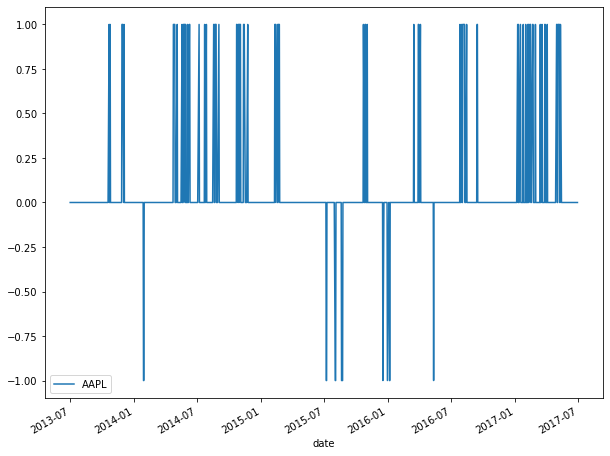

In [18]:
signal = get_long_short(close, lookback_high, lookback_low)
signal.plot(figsize=(10, 8), y = 'AAPL')

The chart above shows the signals generated

In [24]:
print(signal)

ticker      A  AAL  AAP  AAPL  ABBV  ABC  ABT  ACN  ADBE  ADI  ...  XL  XLNX  \
date                                                           ...             
2013-07-01  0    0    0     0     0    0    0    0     0    0  ...   0     0   
2013-07-02  0    0    0     0     0    0    0    0     0    0  ...   0     0   
2013-07-03  0    0    0     0     0    0    0    0     0    0  ...   0     0   
2013-07-05  0    0    0     0     0    0    0    0     0    0  ...   0     0   
2013-07-08  0    0    0     0     0    0    0    0     0    0  ...   0     0   
...        ..  ...  ...   ...   ...  ...  ...  ...   ...  ...  ...  ..   ...   
2017-06-26  0    0    0     0     0    0    0    0     0    0  ...   0     0   
2017-06-27  0    0    0     0     0    0    0    0     0    0  ...   0     0   
2017-06-28  0    0   -1     0     0    0    0    0     0    0  ...   0     0   
2017-06-29  0    0   -1     0     0    0    0    0     0    0  ...   0     0   
2017-06-30  0    0    0     0     0    0

# Filter Signals

That was a lot of repeated signals! If we're already shorting a stock, having an additional signal to short a stock isn't helpful for this strategy. This also applies to additional long signals when the last signal was long.

Implement filter_signals to filter out repeated long or short signals within the lookahead_days. If the previous signal was the same, change the signal to 0 (do nothing signal). For example, say you have a single stock time series that is

[1, 0, 1, 0, 1, 0, -1, -1]

Running filter_signals with a lookahead of 3 days should turn those signals into

[1, 0, 0, 0, 1, 0, -1, 0]

The clear_signals function will remove all signals within a window after the last signal. For example, say you're using a windows size of 3 with clear_signals. It would turn the Series of long signals

[0, 1, 0, 0, 1, 1, 0, 1, 0]

into

[0, 1, 0, 0, 0, 1, 0, 0, 0]

clear_signals only takes a Series of the same type of signals, where 1 is the signal and 0 is no signal. It can't take a mix of long and short signals.

In [36]:
def clear_signals(signals, window_size):
    """
    Clear out signals in a Series of just long or short signals.
    
    Remove the number of signals down to 1 within the window size time period.
    
    Parameters
    ----------
    signals : Pandas Series
        The long, short, or do nothing signals
    window_size : int
        The number of days to have a single signal       
    
    Returns
    -------
    signals : Pandas Series
        Signals with the signals removed from the window size
    """
    # Start with buffer of window size
    # This handles the edge case of calculating past_signal in the beginning
    clean_signals = [0]*window_size
    
    for signal_i, current_signal in enumerate(signals):
        # Check if there was a signal in the past window_size of days
        has_past_signal = bool(sum(clean_signals[signal_i:signal_i+window_size]))
        # Use the current signal if there's no past signal, else 0/False
        clean_signals.append(not has_past_signal and current_signal)
        
    # Remove buffer
    clean_signals = clean_signals[window_size:]

    # Return the signals as a Series of Ints
    return pd.Series(np.array(clean_signals).astype(np.int), signals.index)

In [37]:
def filter_signals(signal, lookahead_days):
    """
    Filter out signals in a DataFrame.
    
    Parameters
    ----------
    signal : DataFrame
        The long, short, and do nothing signals for each ticker and date
    lookahead_days : int
        The number of days to look ahead
    
    Returns
    -------
    filtered_signal : DataFrame
        The filtered long, short, and do nothing signals for each ticker and date
    """
    #TODO: Implement function
    # filter long signals
    long_signals = signal[signal == 1].fillna(0)
    # filter short signals and invert sign
    short_signals = -1*signal[signal == -1].fillna(0)
    for ticker in signal.columns:
        # clear each respective signal
        long_signals[ticker] = clear_signals(long_signals[ticker], lookahead_days)
        short_signals[ticker] = clear_signals(short_signals[ticker], lookahead_days)
    # combine the two types of signals
    filtered_signal = long_signals - short_signals
    
    return filtered_signal

Let's check below the signal with 5, 10 and 20 days lookahead days

In [40]:
signal_5 = filter_signals(signal, 5)
signal_10 = filter_signals(signal, 10)
signal_20 = filter_signals(signal, 20)

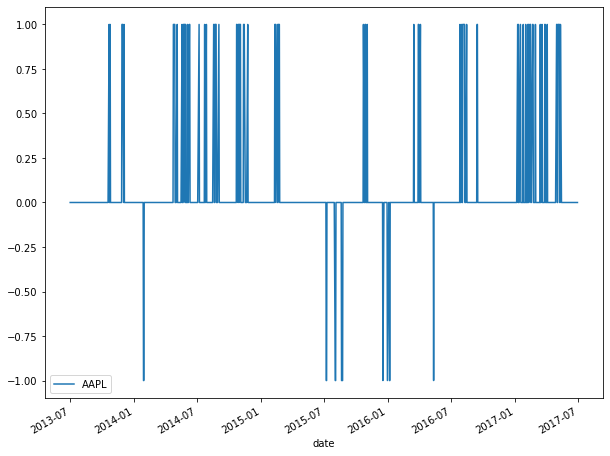

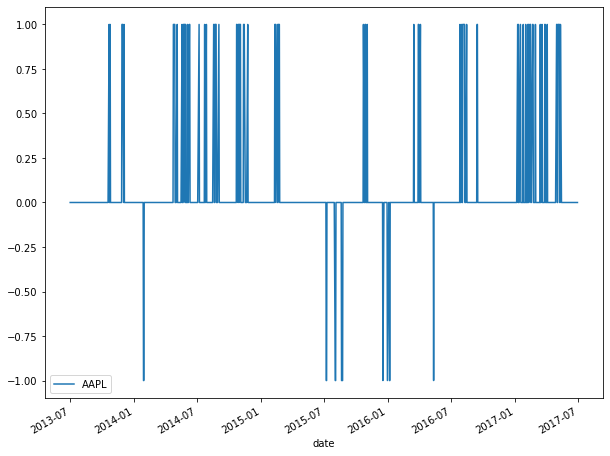

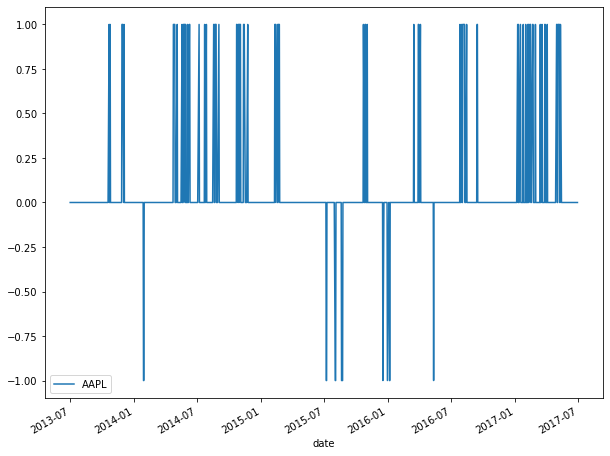

In [41]:
for signal_data, signal_days in [(signal_5, 5), (signal_10, 10), (signal_20, 20)]:
    signal.plot(figsize=(10, 8), y = 'AAPL')

# Lookahead Prices

With the trading signal done, we can start working on evaluating how many days to short or long the stocks. In this problem, implement get_lookahead_prices to get the close price days ahead in time. You can get the number of days from the variable lookahead_days. We'll use the lookahead prices to calculate future returns in another problem.

In [47]:
def get_lookahead_prices(close, lookahead_days):
    """
    Get the lookahead prices for `lookahead_days` number of days.
    
    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    lookahead_days : int
        The number of days to look ahead
    
    Returns
    -------
    lookahead_prices : DataFrame
        The lookahead prices for each ticker and date
    """
    lookahead_prices = close.shift(-lookahead_days)
    
    return lookahead_prices

Using the get_lookahead_prices function, let's generate lookahead closing prices for 5, 10, and 20 days.

In [48]:
lookahead_5 = get_lookahead_prices(close, 5)
lookahead_10 = get_lookahead_prices(close, 10)
lookahead_20 = get_lookahead_prices(close, 20)

<AxesSubplot:xlabel='date'>

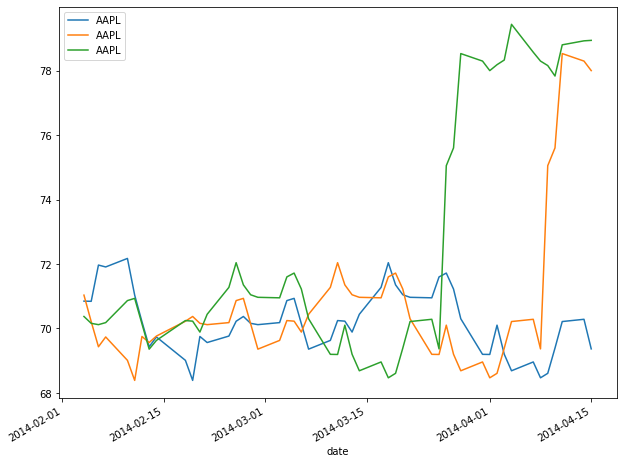

In [51]:
ax = lookahead_5.iloc[150:200].plot(figsize=(10, 8), y = 'AAPL', legend=True)
lookahead_10.iloc[150:200].plot(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)
lookahead_20.iloc[150:200].plot(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)

# Lookahead Price Returns

We implement get_return_lookahead to generate the log price return between the closing price and the lookahead price.

In [52]:
def get_return_lookahead(close, lookahead_prices):
    """
    Calculate the log returns from the lookahead days to the signal day.
    
    Parameters
    ----------
    close : DataFrame
        Close price for each ticker and date
    lookahead_prices : DataFrame
        The lookahead prices for each ticker and date
    
    Returns
    -------
    lookahead_returns : DataFrame
        The lookahead log returns for each ticker and date
    """
    
    lookahead_returns = np.log(lookahead_prices) - np.log(close)
    return lookahead_returns

In [53]:
price_return_5 = get_return_lookahead(close, lookahead_5)
price_return_10 = get_return_lookahead(close, lookahead_10)
price_return_20 = get_return_lookahead(close, lookahead_20)

<AxesSubplot:xlabel='date'>

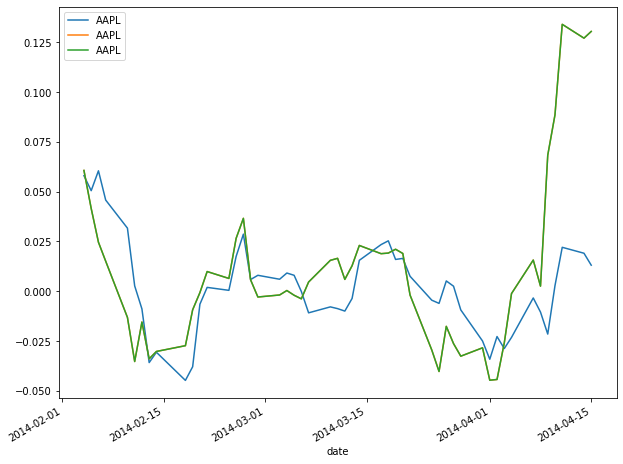

In [54]:
ax = price_return_5.iloc[150:200].plot(figsize=(10, 8), y = 'AAPL', legend=True)
price_return_10.iloc[150:200].plot(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)
price_return_10.iloc[150:200].plot(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)

# Compute the Signal Return

Using the price returns generate the signal returns.

In [55]:
def get_signal_return(signal, lookahead_returns):
    """
    Compute the signal returns.
    
    Parameters
    ----------
    signal : DataFrame
        The long, short, and do nothing signals for each ticker and date
    lookahead_returns : DataFrame
        The lookahead log returns for each ticker and date
    
    Returns
    -------
    signal_return : DataFrame
        Signal returns for each ticker and date
    """
    # element-wise multiplication between signals and returns
    signal_return = signal.multiply(lookahead_returns)
    
    return signal_return

In [56]:
signal_return_5 = get_signal_return(signal_5, price_return_5)
signal_return_10 = get_signal_return(signal_10, price_return_10)
signal_return_20 = get_signal_return(signal_20, price_return_20)

<AxesSubplot:xlabel='date'>

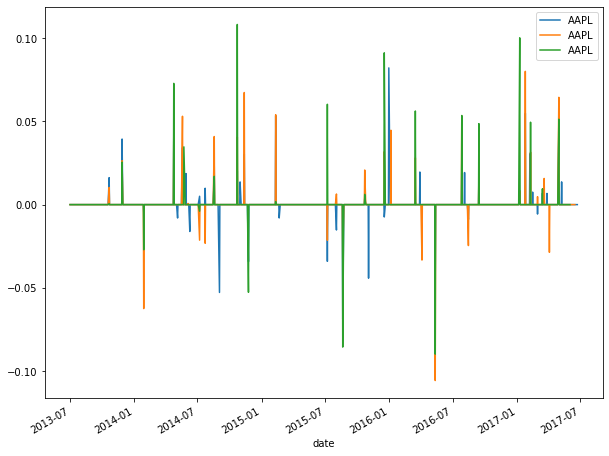

In [58]:
ax = signal_return_5.plot(figsize=(10, 8), y = 'AAPL', legend=True)
signal_return_10.plot(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)
signal_return_20.plot(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)

# Test for Significance

Let's plot a histogram of the signal return values.

<AxesSubplot:ylabel='Frequency'>

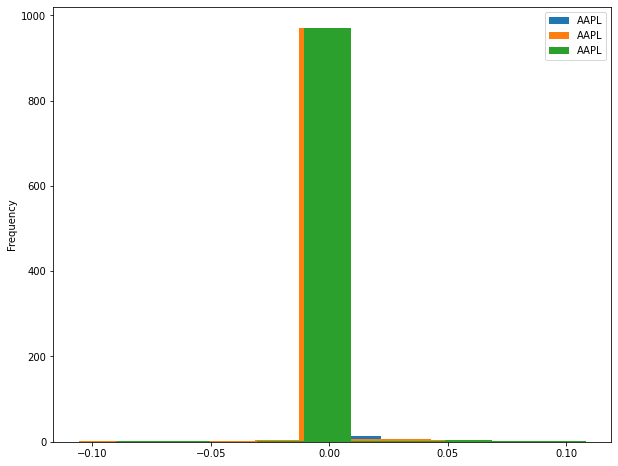

In [61]:
ax = signal_return_5.plot.hist(figsize=(10, 8), y = 'AAPL', legend=True)
signal_return_10.plot.hist(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)
signal_return_20.plot.hist(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)

More or less Normally distributed around 0 for all look ahead days. There might be outliers in the 10 and 20 day histograms which slightly increases the probability of possitive returns.

# Kolmogorov-Smirnov Test

While you can see the outliers in the histogram, we need to find the stocks that are causing these outlying returns. We'll use the Kolmogorov-Smirnov Test or KS-Test. This test will be applied to teach ticker's signal returns where a long or short signal exits.

In [62]:
# Filter out returns that don't have a long or short signal.
long_short_signal_returns_5 = signal_return_5[signal_5 != 0].stack()
long_short_signal_returns_10 = signal_return_10[signal_10 != 0].stack()
long_short_signal_returns_20 = signal_return_20[signal_20 != 0].stack()

# Get just ticker and signal return
long_short_signal_returns_5 = long_short_signal_returns_5.reset_index().iloc[:, [1,2]]
long_short_signal_returns_5.columns = ['ticker', 'signal_return']
long_short_signal_returns_10 = long_short_signal_returns_10.reset_index().iloc[:, [1,2]]
long_short_signal_returns_10.columns = ['ticker', 'signal_return']
long_short_signal_returns_20 = long_short_signal_returns_20.reset_index().iloc[:, [1,2]]
long_short_signal_returns_20.columns = ['ticker', 'signal_return']

# View some of the data
long_short_signal_returns_5.head(10)

,ticker,signal_return
0,A,0.007326
1,ABC,0.016396
2,ADP,0.009815
3,AKAM,0.044005
4,ALGN,0.015456
5,APC,0.003059
6,BA,0.080613
7,BCR,0.009334
8,BIIB,0.041762
9,CHK,0.015132


In [63]:
from scipy.stats import kstest


def calculate_kstest(long_short_signal_returns):
    """
    Calculate the KS-Test against the signal returns with a long or short signal.
    
    Parameters
    ----------
    long_short_signal_returns : DataFrame
        The signal returns which have a signal.
        This DataFrame contains two columns, "ticker" and "signal_return"
    
    Returns
    -------
    ks_values : Pandas Series
        KS static for all the tickers
    p_values : Pandas Series
        P value for all the tickers
        
    """
    mean = np.mean(long_short_signal_returns['signal_return'].values)
    std = np.std(long_short_signal_returns['signal_return'].values)

    ks_values, p_values = pd.Series(), pd.Series()
    
    for ticker, data in long_short_signal_returns.groupby('ticker'):
        D, p_value = kstest(rvs=data['signal_return'].values, cdf='norm', args=(mean,std))
        ks_values[ticker] = D
        p_values[ticker] = p_value
    
    return ks_values, p_values

In [64]:
ks_values_5, p_values_5 = calculate_kstest(long_short_signal_returns_5)
ks_values_10, p_values_10 = calculate_kstest(long_short_signal_returns_10)
ks_values_20, p_values_20 = calculate_kstest(long_short_signal_returns_20)

print('ks_values_5')
print(ks_values_5.head(10))
print('p_values_5')
print(p_values_5.head(10))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


ks_values_5
A       0.117715
AAL     0.161687
AAP     0.146775
AAPL    0.225169
ABBV    0.109809
ABC     0.269177
ABT     0.203660
ACN     0.233559
ADBE    0.172597
ADI     0.122769
dtype: float64
p_values_5
A       0.625830
AAL     0.209977
AAP     0.238877
AAPL    0.026216
ABBV    0.751805
ABC     0.002273
ABT     0.067819
ACN     0.036666
ADBE    0.128916
ADI     0.573496
dtype: float64


# Find Outliers

With the ks and p values calculate, let's find which symbols are the outliers. Implement the find_outliers function to find the following outliers:

Symbols that pass the null hypothesis with a p-value less than pvalue_threshold.
Symbols that with a KS value above ks_threshold.

In [65]:
def find_outliers(ks_values, p_values, ks_threshold, pvalue_threshold=0.05):
    """
    Find outlying symbols using KS values and P-values
    
    Parameters
    ----------
    ks_values : Pandas Series
        KS static for all the tickers
    p_values : Pandas Series
        P value for all the tickers
    ks_threshold : float
        The threshold for the KS statistic
    pvalue_threshold : float
        The threshold for the p-value
    
    Returns
    -------
    outliers : set of str
        Symbols that are outliers
    """
    
    return set(list(ks_values[ks_values > ks_threshold].index)) & set(list(p_values[p_values < pvalue_threshold].index))

In [68]:
ks_threshold = 0.4
outliers_5 = find_outliers(ks_values_5, p_values_5, ks_threshold)
outliers_10 = find_outliers(ks_values_10, p_values_10, ks_threshold)
outliers_20 = find_outliers(ks_values_20, p_values_20, ks_threshold)

outlier_tickers = outliers_5.union(outliers_10).union(outliers_20)
print('{} Outliers Found:\n{}'.format(len(outlier_tickers), ', '.join(list(outlier_tickers))))

1 Outliers Found:
SPGI


<AxesSubplot:ylabel='Frequency'>

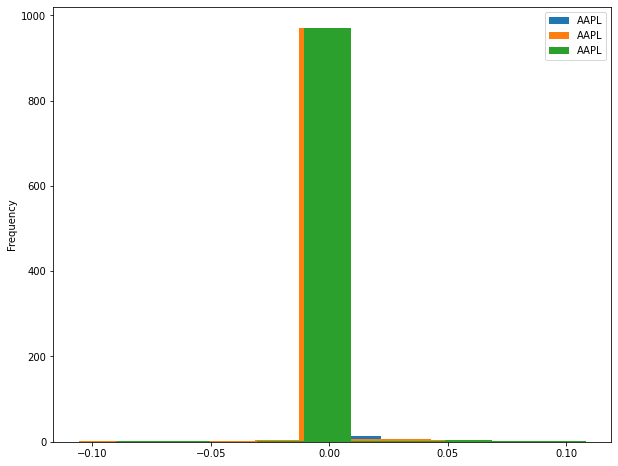

In [69]:
good_tickers = list(set(close.columns) - outlier_tickers)
ax = signal_return_5[good_tickers].plot.hist(figsize=(10, 8), y = 'AAPL', legend=True)
signal_return_10[good_tickers].plot.hist(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)
signal_return_20[good_tickers].plot.hist(figsize=(10, 8), y = 'AAPL', ax = ax, legend=True)